In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import diffimTests as dit

In [2]:
varSourceFlux = 620. * np.sqrt(2.)
obj1 = dit.DiffimTest(varFlux2=np.repeat(varSourceFlux, 50), n_sources=500, sourceFluxRange=(200, 20000),
                     templateNoNoise=False, skyLimited=False)
obj2 = obj1.clone()

{'ZOGY': {'FP': 4, 'FN': 18, 'TP': 32}, 'ALstack': {'FP': 11, 'FN': 13, 'TP': 37}, 'SZOGY': {'FP': 9, 'FN': 23, 'TP': 27}, 'ALstack_decorr': {'FP': 3, 'FN': 20, 'TP': 30}}


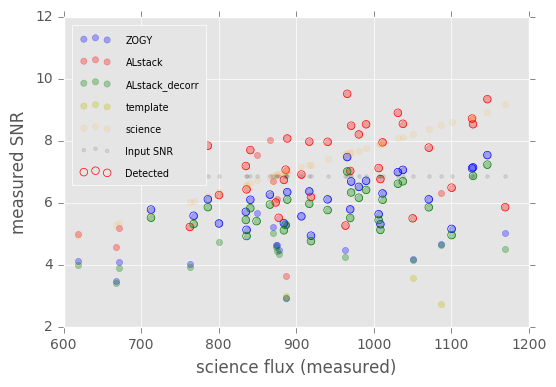

In [3]:
res1 = obj1.runTest(zogyImageSpace=False, returnSources=True)
df1, _ = obj1.doPlotWithDetectionsHighlighted(res1, transientsOnly=True, addPresub=True, 
                                              xaxisIsScienceForcedPhot=True,
                                              skyLimited=False, alpha=0.3)
del res1['sources']
print res1
plt.xlim(600, 1200)
plt.ylim(2, 12);

{'ZOGY': {'FP': 6, 'FN': 19, 'TP': 31}, 'ALstack': {'FP': 11, 'FN': 13, 'TP': 37}, 'SZOGY': {'FP': 7, 'FN': 26, 'TP': 24}, 'ALstack_decorr': {'FP': 3, 'FN': 20, 'TP': 30}}


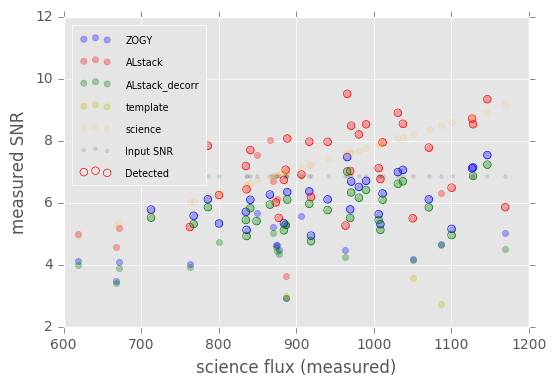

In [4]:
res2 = obj2.runTest(zogyImageSpace=True, returnSources=True)
df2, _ = obj2.doPlotWithDetectionsHighlighted(res2, transientsOnly=True, addPresub=True, 
                                              xaxisIsScienceForcedPhot=True,
                                              skyLimited=False, alpha=0.3)
del res2['sources']
print res2
plt.xlim(600, 1200)
plt.ylim(2, 12);

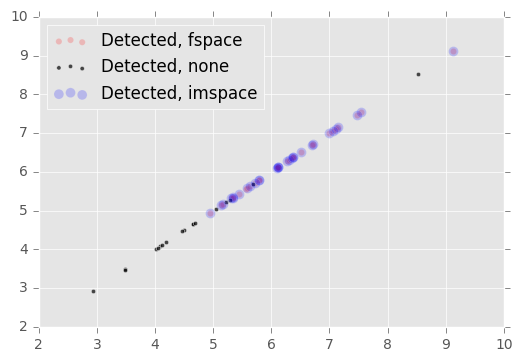

In [5]:
plt.scatter(df1[df1.ZOGY_detected == True].ZOGY_SNR.values,
            df2[df1.ZOGY_detected == True].ZOGY_SNR.values, c='r', alpha=0.2, label='Detected, fspace')
#ax = df[df.ZOGY_detected == True].plot.scatter('ZOGY_SNR', 'ALstack_decorr_SNR', c='r', alpha=0.2)
plt.scatter(df1[df1.ZOGY_detected == False].ZOGY_SNR.values,
            df2[df1.ZOGY_detected == False].ZOGY_SNR.values, c='k', s=10, alpha=0.7, label='Detected, none')
#df[df.ZOGY_detected == False].plot.scatter('ZOGY_SNR', 'ALstack_decorr_SNR', c='k', s=10, alpha=0.7, ax=ax)
plt.scatter(df1[df2.ZOGY_detected == True].ZOGY_SNR.values,
            df2[df2.ZOGY_detected == True].ZOGY_SNR.values, c='b', s=50, alpha=0.2, label='Detected, imspace')
plt.legend(loc='upper left')
#df[df.ALstack_decorr_detected == True].plot.scatter('ZOGY_SNR', 'ALstack_decorr_SNR', c='b', s=50, alpha=0.2, ax=ax)
#plt.xlim(3.5, 7.);
#plt.ylim(3.5, 7.);

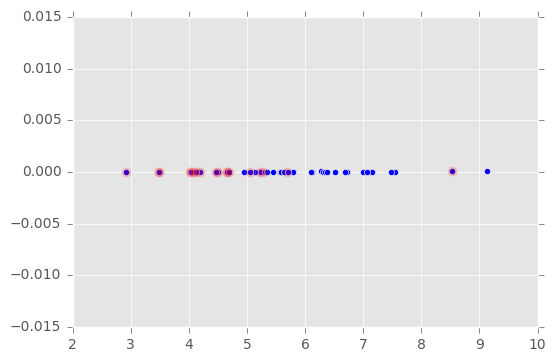

In [6]:
plt.scatter(df1.ZOGY_SNR.values,
            df2.ZOGY_SNR.values - df1.ZOGY_SNR.values)
plt.scatter(df1[df1.ZOGY_detected == False].ZOGY_SNR.values,
            df2[df1.ZOGY_detected == False].ZOGY_SNR.values - 
            df1[df1.ZOGY_detected == False].ZOGY_SNR.values, c='r', s=50, alpha=0.2)
#plt.scatter(df1[df2.ZOGY_detected == True].ZOGY_SNR.values,
#            df2[df2.ZOGY_detected == True].ZOGY_SNR.values, c='b', s=50, alpha=0.2)

In [7]:
tmp1 = df1[(df1.ZOGY_detected == True) & (df2.ZOGY_detected == False)]
dit.sizeme(tmp1[tmp1.columns[0:12]])

,inputFlux,templateFlux,scienceFlux,inputId,inputCentroid_x,inputCentroid_y,inputSNR,ZOGY_SNR,ZOGY_flux,ZOGY_fluxSigma,ZOGY_detected,ALstack_SNR
4,876.812409,-52.629421,906.591878,5,45.330432,289.459958,6.86671,5.56637,908.469302,163.206763,True,6.916586


In [8]:
tmp2 = df2[(df1.ZOGY_detected == True) & (df2.ZOGY_detected == False)]
dit.sizeme(tmp2[tmp2.columns[0:12]])

,inputFlux,templateFlux,scienceFlux,inputId,inputCentroid_x,inputCentroid_y,inputSNR,ZOGY_SNR,ZOGY_flux,ZOGY_fluxSigma,ZOGY_detected,ALstack_SNR
4,876.812409,-52.629421,906.591878,5,45.330432,289.459958,6.86671,5.566365,908.468441,163.206769,False,6.916586


stats(mean=8.6268002312066971e-08, stdev=0.00049012443631784935, min=-0.0026976536866953893, max=0.0028890396107108529)
stats(mean=-1.2590092952172665e-07, stdev=0.00049006670750888367, min=-0.002878775078443141, max=0.0027010496120283278)
A&L(dec): stats(mean=-0.051391806, stdev=25.281273, min=-84.637016, max=98.622658)
ZOGY: stats(mean=0.18963124317575239, stdev=24.283352846354294, min=-119.24590675099815, max=143.51005786342861)
A&L(dec) - ZOGY: stats(mean=0.0034128495022090208, stdev=2.5467488471987103, min=-7.7990769825185398, max=18.503054977509596)
A&L(dec) - A&L: stats(mean=-0.028923899, stdev=6.8198528, min=-32.886147, max=36.535721)
Added 0: stats(mean=8.6268002312066971e-08, stdev=0.00049012443631784935, min=-0.0026976536866953893, max=0.0028890396107108529)
Added 1: stats(mean=-1.2590092952172665e-07, stdev=0.00049006670750888367, min=-0.002878775078443141, max=0.0027010496120283278)


diffimTests/diffimTests.py:71: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  alIm = alIm[(cx-sz):(cx+sz), (cy-sz):(cy+sz)]
diffimTests/diffimTests.py:79: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  zIm = zIm[(cx-sz):(cx+sz), (cy-sz):(cy+sz)]
diffimTests/diffimTests.py:102: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  imagesToPlot[ind] = im[(cx-sz):(cx+sz), (cy-sz):(cy+sz)]


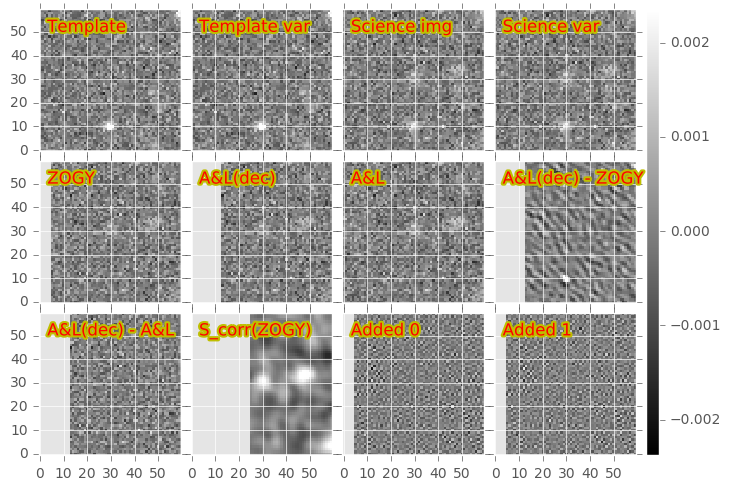

In [9]:
tmpIm = obj1.D_ZOGY.im - obj2.D_ZOGY.im
print dit.computeClippedImageStats(tmpIm)
tmpVar = obj1.D_ZOGY.var - obj2.D_ZOGY.var
print dit.computeClippedImageStats(tmpVar)

obj2.doPlot([tmp1.inputCentroid_y.values[0], tmp1.inputCentroid_x.values[0], 30], 
            include_Szogy=True, addedImgs=(tmpIm, tmpVar));

OK, let's see what's going on in the ZOGY / image space version.

UPDATE: I think I realized what's happening. In the `image space` version, I am not convolving the variance planes with the same kernels as the images. I am just adding the original variance planes as I do in the `non-image space` version. This is wrong. I need to convolve the variance planes and then add them. I also need to do that (after FFT-ing) in the `non-image space` version.

UPDATE2: Data above is after fixing for this, so it is not actually the cause. There is this tiny weird "echo" residual near each variable source.

(41, 41)
stats(mean=0.57698438610305558, stdev=17.337052968613975, min=-74.0, max=906.0)
stats(mean=0.88270007525378957, stdev=17.442291202031928, min=-82.0, max=611.0)
2.998810232 2.998810232


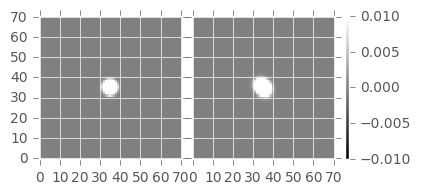

In [10]:
im1, im1_psf, im1_var, sig1 = obj2.im1.im, obj2.im1.psf, obj2.im1.var, obj2.im1.sig
im2, im2_psf, im2_var, sig2 = obj2.im2.im, obj2.im2.psf, obj2.im2.var, obj2.im2.sig
F_r = F_n = 1.
padSize = 15 #im1_psf.shape[0]
print im1_psf.shape

print dit.computeClippedImageStats(im1)
#sig1 = dit.computeClippedImageStats(im1).stdev
print dit.computeClippedImageStats(im2)
#sig2 = dit.computeClippedImageStats(im2).stdev

sigR, sigN, P_r_hat, P_n_hat, denom, padded_psf1, padded_psf2 = dit.zogy.ZOGYUtils(im1, im2, im1_psf, im2_psf, sig1, 
                                                                                   sig2, F_r, F_n, padSize=padSize)
print padded_psf1.sum(), padded_psf2.sum()

delta = 0.
K_r_hat = (P_r_hat + delta) / (denom + delta)
K_n_hat = (P_n_hat + delta) / (denom + delta)
K_r = np.fft.ifft2(K_r_hat).real
K_n = np.fft.ifft2(K_n_hat).real

dit.plotImageGrid((padded_psf1, padded_psf2), clim=(-0.01, 0.01))

(71, 71)
(57, 57)


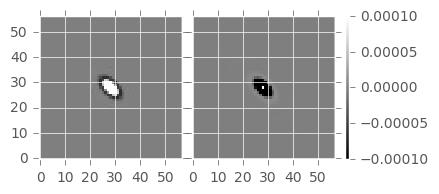

In [11]:
print K_n.shape
ps = padSize // 2
K_n = K_n[ps:-ps, ps:-ps]
K_r = K_r[ps:-ps, ps:-ps]
print K_n.shape
#K_n /= K_n.sum()
#K_r /= K_r.sum()
dit.plotImageGrid((K_n, K_r), clim=(-0.0001, 0.0001))

In [12]:
import scipy
im1c = scipy.ndimage.filters.convolve(im1, K_n, mode='constant', cval=np.nan)
im2c = scipy.ndimage.filters.convolve(im2, K_r, mode='constant', cval=np.nan)
D = im2c - im1c
D *= np.sqrt(sig1**2. + sig2**2.)

stats(mean=0.13965065089950218, stdev=24.274297376673367, min=-119.24652825110027, max=143.51001067326342)
stats(mean=0.2058585436362477, stdev=24.316328799635286, min=-119.24656319863152, max=143.51004823547262)
stats(mean=-8.6296159907023742e-07, stdev=7.2594268000933122e-05, min=-0.00048989484600525657, max=0.00030187216272992146)
A&L(dec): stats(mean=-0.051391806, stdev=25.281273, min=-84.637016, max=98.622658)
ZOGY: stats(mean=0.18963124317575239, stdev=24.283352846354294, min=-119.24590675099815, max=143.51005786342861)
A&L(dec) - ZOGY: stats(mean=0.0034128495022090208, stdev=2.5467488471987103, min=-7.7990769825185398, max=18.503054977509596)
A&L(dec) - A&L: stats(mean=-0.028923899, stdev=6.8198528, min=-32.886147, max=36.535721)
Added 0: stats(mean=0.2058585436362477, stdev=24.316328799635286, min=-119.24656319863152, max=143.51004823547262)
Added 1: stats(mean=-8.6296159907023742e-07, stdev=7.2594268000933122e-05, min=-0.00048989484600525657, max=0.00030187216272992146)


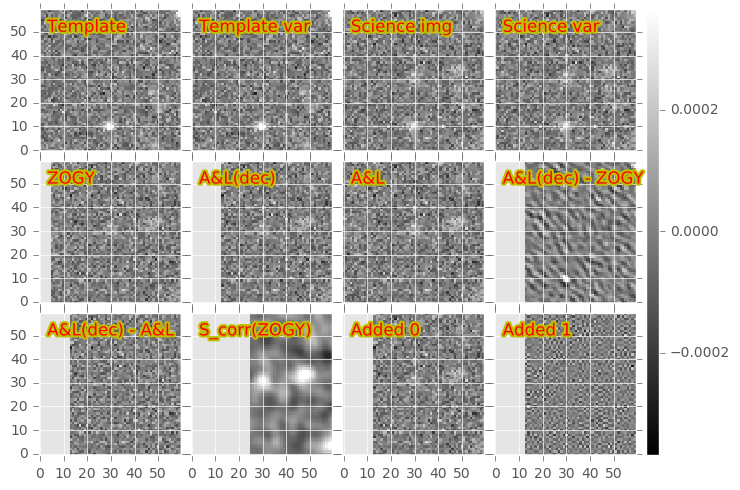

In [14]:
tmpIm = obj1.D_ZOGY.im - D
print dit.computeClippedImageStats(obj1.D_ZOGY.im)
print dit.computeClippedImageStats(D)
print dit.computeClippedImageStats(tmpIm)

obj2.doPlot([tmp1.inputCentroid_y.values[0], tmp1.inputCentroid_x.values[0], 30], include_Szogy=True, 
            addedImgs=(D, tmpIm,));

In [15]:
D2, _ = dit.zogy.performZOGYImageSpace(im1, im2, im1_var, im2_var, im1_psf, im2_psf, sig1, sig2, F_r, F_n, padSize=padSize)
#D2 *= np.sqrt(sig1**2. + sig2**2.)
tmpIm2 = D2 - D
print dit.computeClippedImageStats(D)
print dit.computeClippedImageStats(D2)
print dit.computeClippedImageStats(tmpIm2)

stats(mean=0.2058585436362477, stdev=24.316328799635286, min=-119.24656319863152, max=143.51004823547262)
stats(mean=0.18963596898731658, stdev=24.283351785579434, min=-119.24663135528336, max=143.50995222023596)
stats(mean=3.2046253372378567e-06, stdev=0.00034154046806541822, min=-0.0015222152655440802, max=0.0024977622565316437)


In [16]:
import gzip, cPickle
cPickle.dump((im1, im2, im1_psf, im2_psf), gzip.GzipFile('for_ian.pkl', 'wb'))

OK, now it might just be an edge effect. Let's look...

No, apparently, it's just that it is detected at 4.9 sigma but not 5.0 in the `imageSpace` ZOGY diffim.

CONCLUSION: It seems that changing detection `thresholdType='pixel_stdev'` is better than the old value of 
`'stdev'`. Except for `SZOGY`, where we must still use `stdev`.

In [17]:
cat1 = obj1.D_ZOGY.doDetection(asDF=True, )
cat2 = obj2.D_ZOGY.doDetection(asDF=True, threshold=4.9)
print cat1.shape, cat2.shape
dit.sizeme(cat1.head())
#cat1.columns.values

(36, 140) (43, 140)


,base_CircularApertureFlux_12_0_flag,base_CircularApertureFlux_12_0_flag_apertureTruncated,base_CircularApertureFlux_12_0_flux,base_CircularApertureFlux_12_0_fluxSigma,base_CircularApertureFlux_17_0_flag,base_CircularApertureFlux_17_0_flag_apertureTruncated,base_CircularApertureFlux_17_0_flux,base_CircularApertureFlux_17_0_fluxSigma,base_CircularApertureFlux_25_0_flag,base_CircularApertureFlux_25_0_flag_apertureTruncated,...,ip_diffim_PsfDipoleFlux_neg_flux,ip_diffim_PsfDipoleFlux_neg_fluxSigma,ip_diffim_PsfDipoleFlux_pos_centroid_x,ip_diffim_PsfDipoleFlux_pos_centroid_xSigma,ip_diffim_PsfDipoleFlux_pos_centroid_y,ip_diffim_PsfDipoleFlux_pos_centroid_ySigma,ip_diffim_PsfDipoleFlux_pos_flag,ip_diffim_PsfDipoleFlux_pos_flux,ip_diffim_PsfDipoleFlux_pos_fluxSigma,parent
0,False,False,922.756712,524.371999,False,False,1121.239077,742.186966,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,0
1,False,False,-85.121986,519.013665,False,False,118.551372,736.927724,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,0
2,False,False,1068.209565,527.179616,False,False,1200.820859,743.000178,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,0
3,False,False,1995.467163,522.578121,False,False,580.591817,739.267984,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,0
4,False,False,1452.907463,522.829210,False,False,1434.672540,739.511117,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,0


In [18]:
dit.sizeme(tmp1)

,inputFlux,templateFlux,scienceFlux,inputId,inputCentroid_x,inputCentroid_y,inputSNR,ZOGY_SNR,ZOGY_flux,ZOGY_fluxSigma,...,ALstack_SNR,ALstack_flux,ALstack_fluxSigma,ALstack_detected,ALstack_decorr_SNR,ALstack_decorr_flux,ALstack_decorr_fluxSigma,ALstack_decorr_detected,templateSNR,scienceSNR
4,876.812409,-52.629421,906.591878,5,45.330432,289.459958,6.86671,5.56637,908.469302,163.206763,...,6.916586,891.80114,128.936606,True,NaN,NaN,NaN,True,-0.539549,7.165674


In [22]:
zzz = cat1[(np.abs(cat1.base_PeakCentroid_x.values - tmp1.inputCentroid_x.values[0]) < 1.) &
    (np.abs(cat1.base_PeakCentroid_y.values - tmp1.inputCentroid_y.values[0]) < 1.)]
print zzz.base_GaussianCentroid_flag
print zzz.base_PsfFlux_flag
print zzz.base_PsfFlux_flux, zzz.base_PsfFlux_flux / zzz.base_PsfFlux_fluxSigma
print zzz.base_PeakLikelihoodFlux_flag
print zzz.base_PeakLikelihoodFlux_flux, zzz.base_PeakLikelihoodFlux_flux / zzz.base_PeakLikelihoodFlux_fluxSigma

22    False
Name: base_GaussianCentroid_flag, dtype: bool
22    False
Name: base_PsfFlux_flag, dtype: bool
22    915.92048
Name: base_PsfFlux_flux, dtype: float64 22    5.602241
dtype: float64
22    False
Name: base_PeakLikelihoodFlux_flag, dtype: bool
22    516.585987
Name: base_PeakLikelihoodFlux_flux, dtype: float64 22    0.496356
dtype: float64


In [21]:
zzz = cat2[(np.abs(cat2.base_PeakCentroid_x.values - tmp1.inputCentroid_x.values[0]) < 1.) &
    (np.abs(cat2.base_PeakCentroid_y.values - tmp1.inputCentroid_y.values[0]) < 1.)]
print zzz.base_GaussianCentroid_flag
print zzz.base_PsfFlux_flag
print zzz.base_PsfFlux_flux, zzz.base_PsfFlux_flux / zzz.base_PsfFlux_fluxSigma
print zzz.base_PeakLikelihoodFlux_flag
print zzz.base_PeakLikelihoodFlux_flux, zzz.base_PeakLikelihoodFlux_flux / zzz.base_PeakLikelihoodFlux_fluxSigma

26    False
Name: base_GaussianCentroid_flag, dtype: bool
26    False
Name: base_PsfFlux_flag, dtype: bool
26    915.919761
Name: base_PsfFlux_flux, dtype: float64 26    5.602236
dtype: float64
26    False
Name: base_PeakLikelihoodFlux_flag, dtype: bool
26    516.585537
Name: base_PeakLikelihoodFlux_flux, dtype: float64 26    0.496354
dtype: float64
